# 解剖机器学习

**樊政**，2020年8月7日

---

---

## 一、基本概念

### 人工智能、机器学习和深度学习

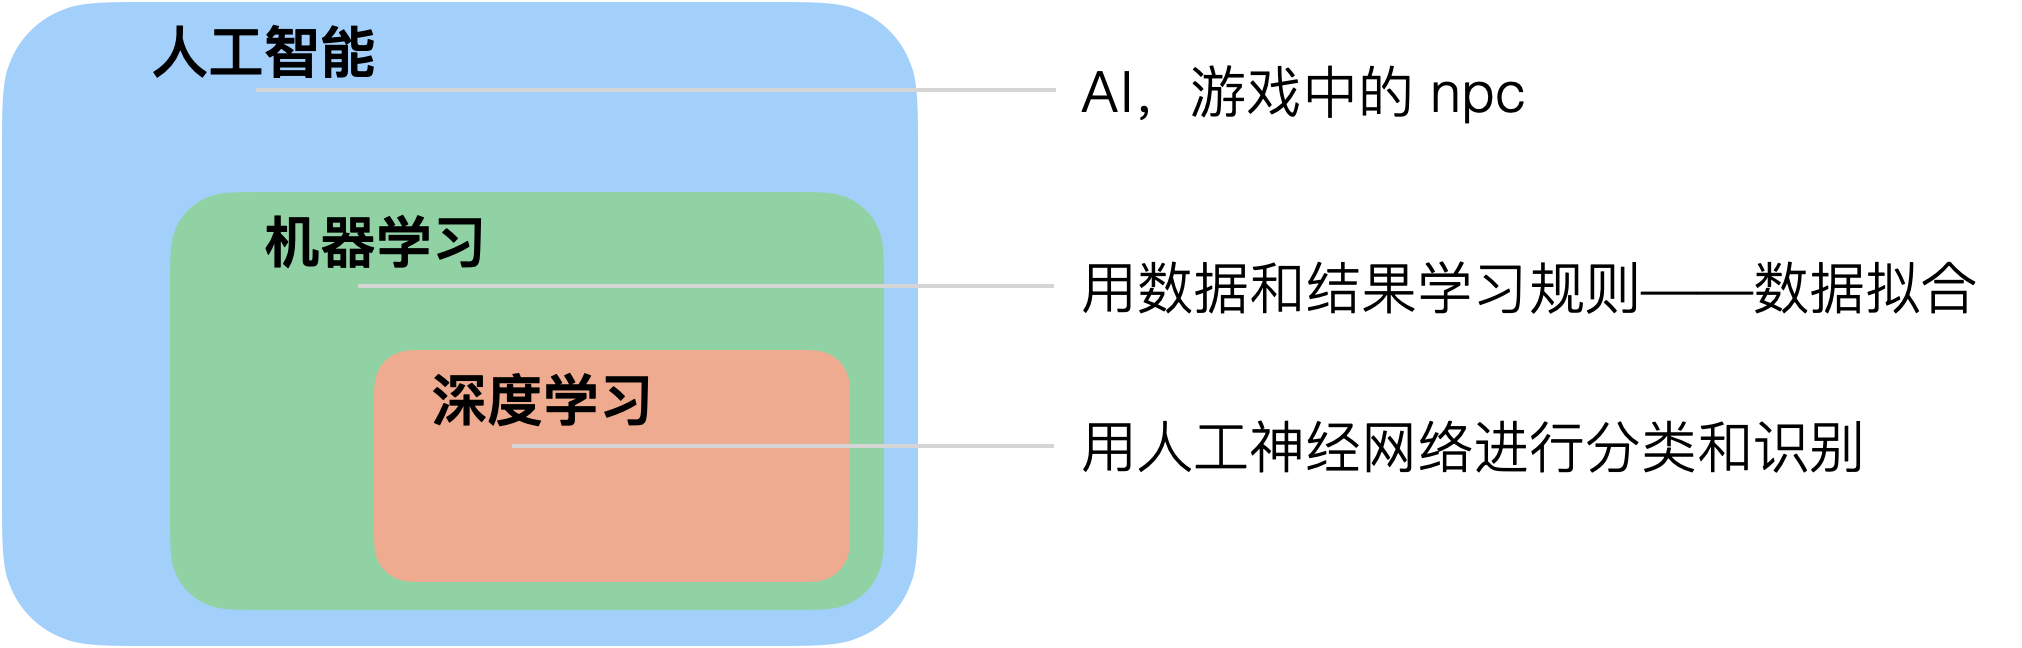

In [11]:
from IPython.display import Image
Image('./AI.png',width=900,embed=True)

> 大多数机器学习问题可以归结为求矢量间的映射
> $$X\to y = A X$$

#### 此次AI革命的主要推动是深度学习——人工神经网络的应用。但是人类并没有真正了解认知和学习的过程。AI寒冬再次来临——一个领域衰落的标志就是科学变成金融概念。

* 2010-2020是这次 AI 热的关键十年，明年可能就会很少看到关于机器学习的新闻

* 下一个热点（如果有的话）很可能是脑机接口（Brain Computer Interface, BCI/BMI）和人机结合（Cyborg）

---

### 下一个热点

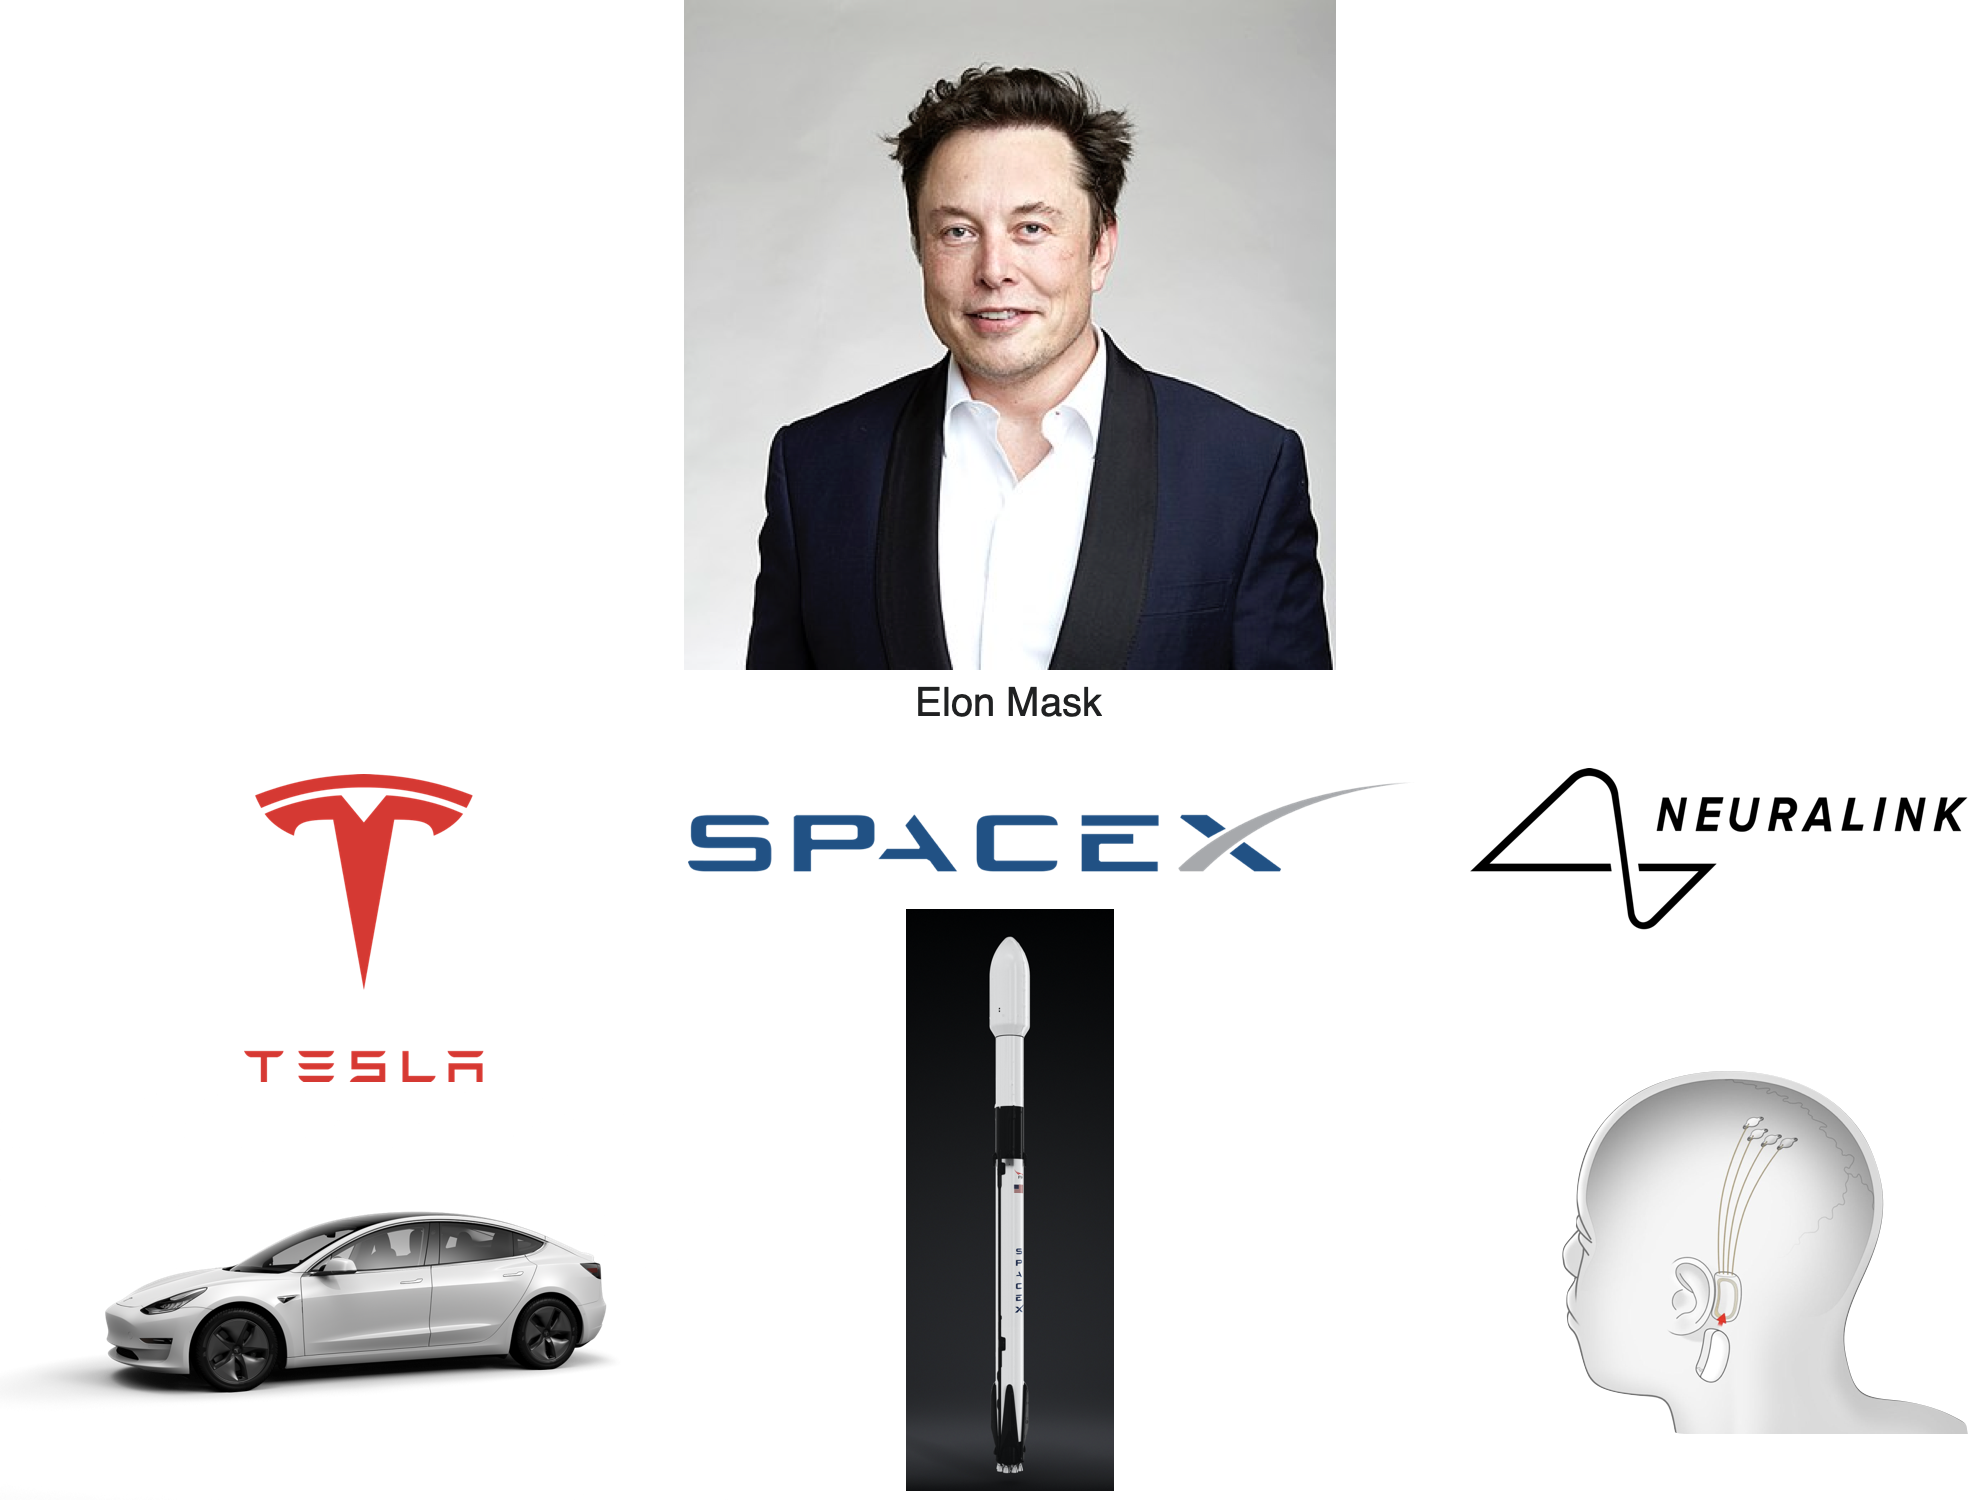

In [9]:
Image("./ElonMask.png",width=850,embed=True)

> **机器之心**
>
> 近日，马斯克在 Twitter 上透露，Neuralink 正在研究一款能够使用户“直接通过芯片听音乐”的产品。
>
> 他表示，Neuralink ”可以帮助控制激素水平，利用它们来增强我们的能力、减轻焦虑等“。
>
> 马斯克：五到十年内，人将与 AI 共生。

#### 计算机 + 金融 = 黄埔军校1945？

---

### 机器学习基本概念

> 机器学习是输入数据和结果，进行模型训练并得到规则的编程范式。

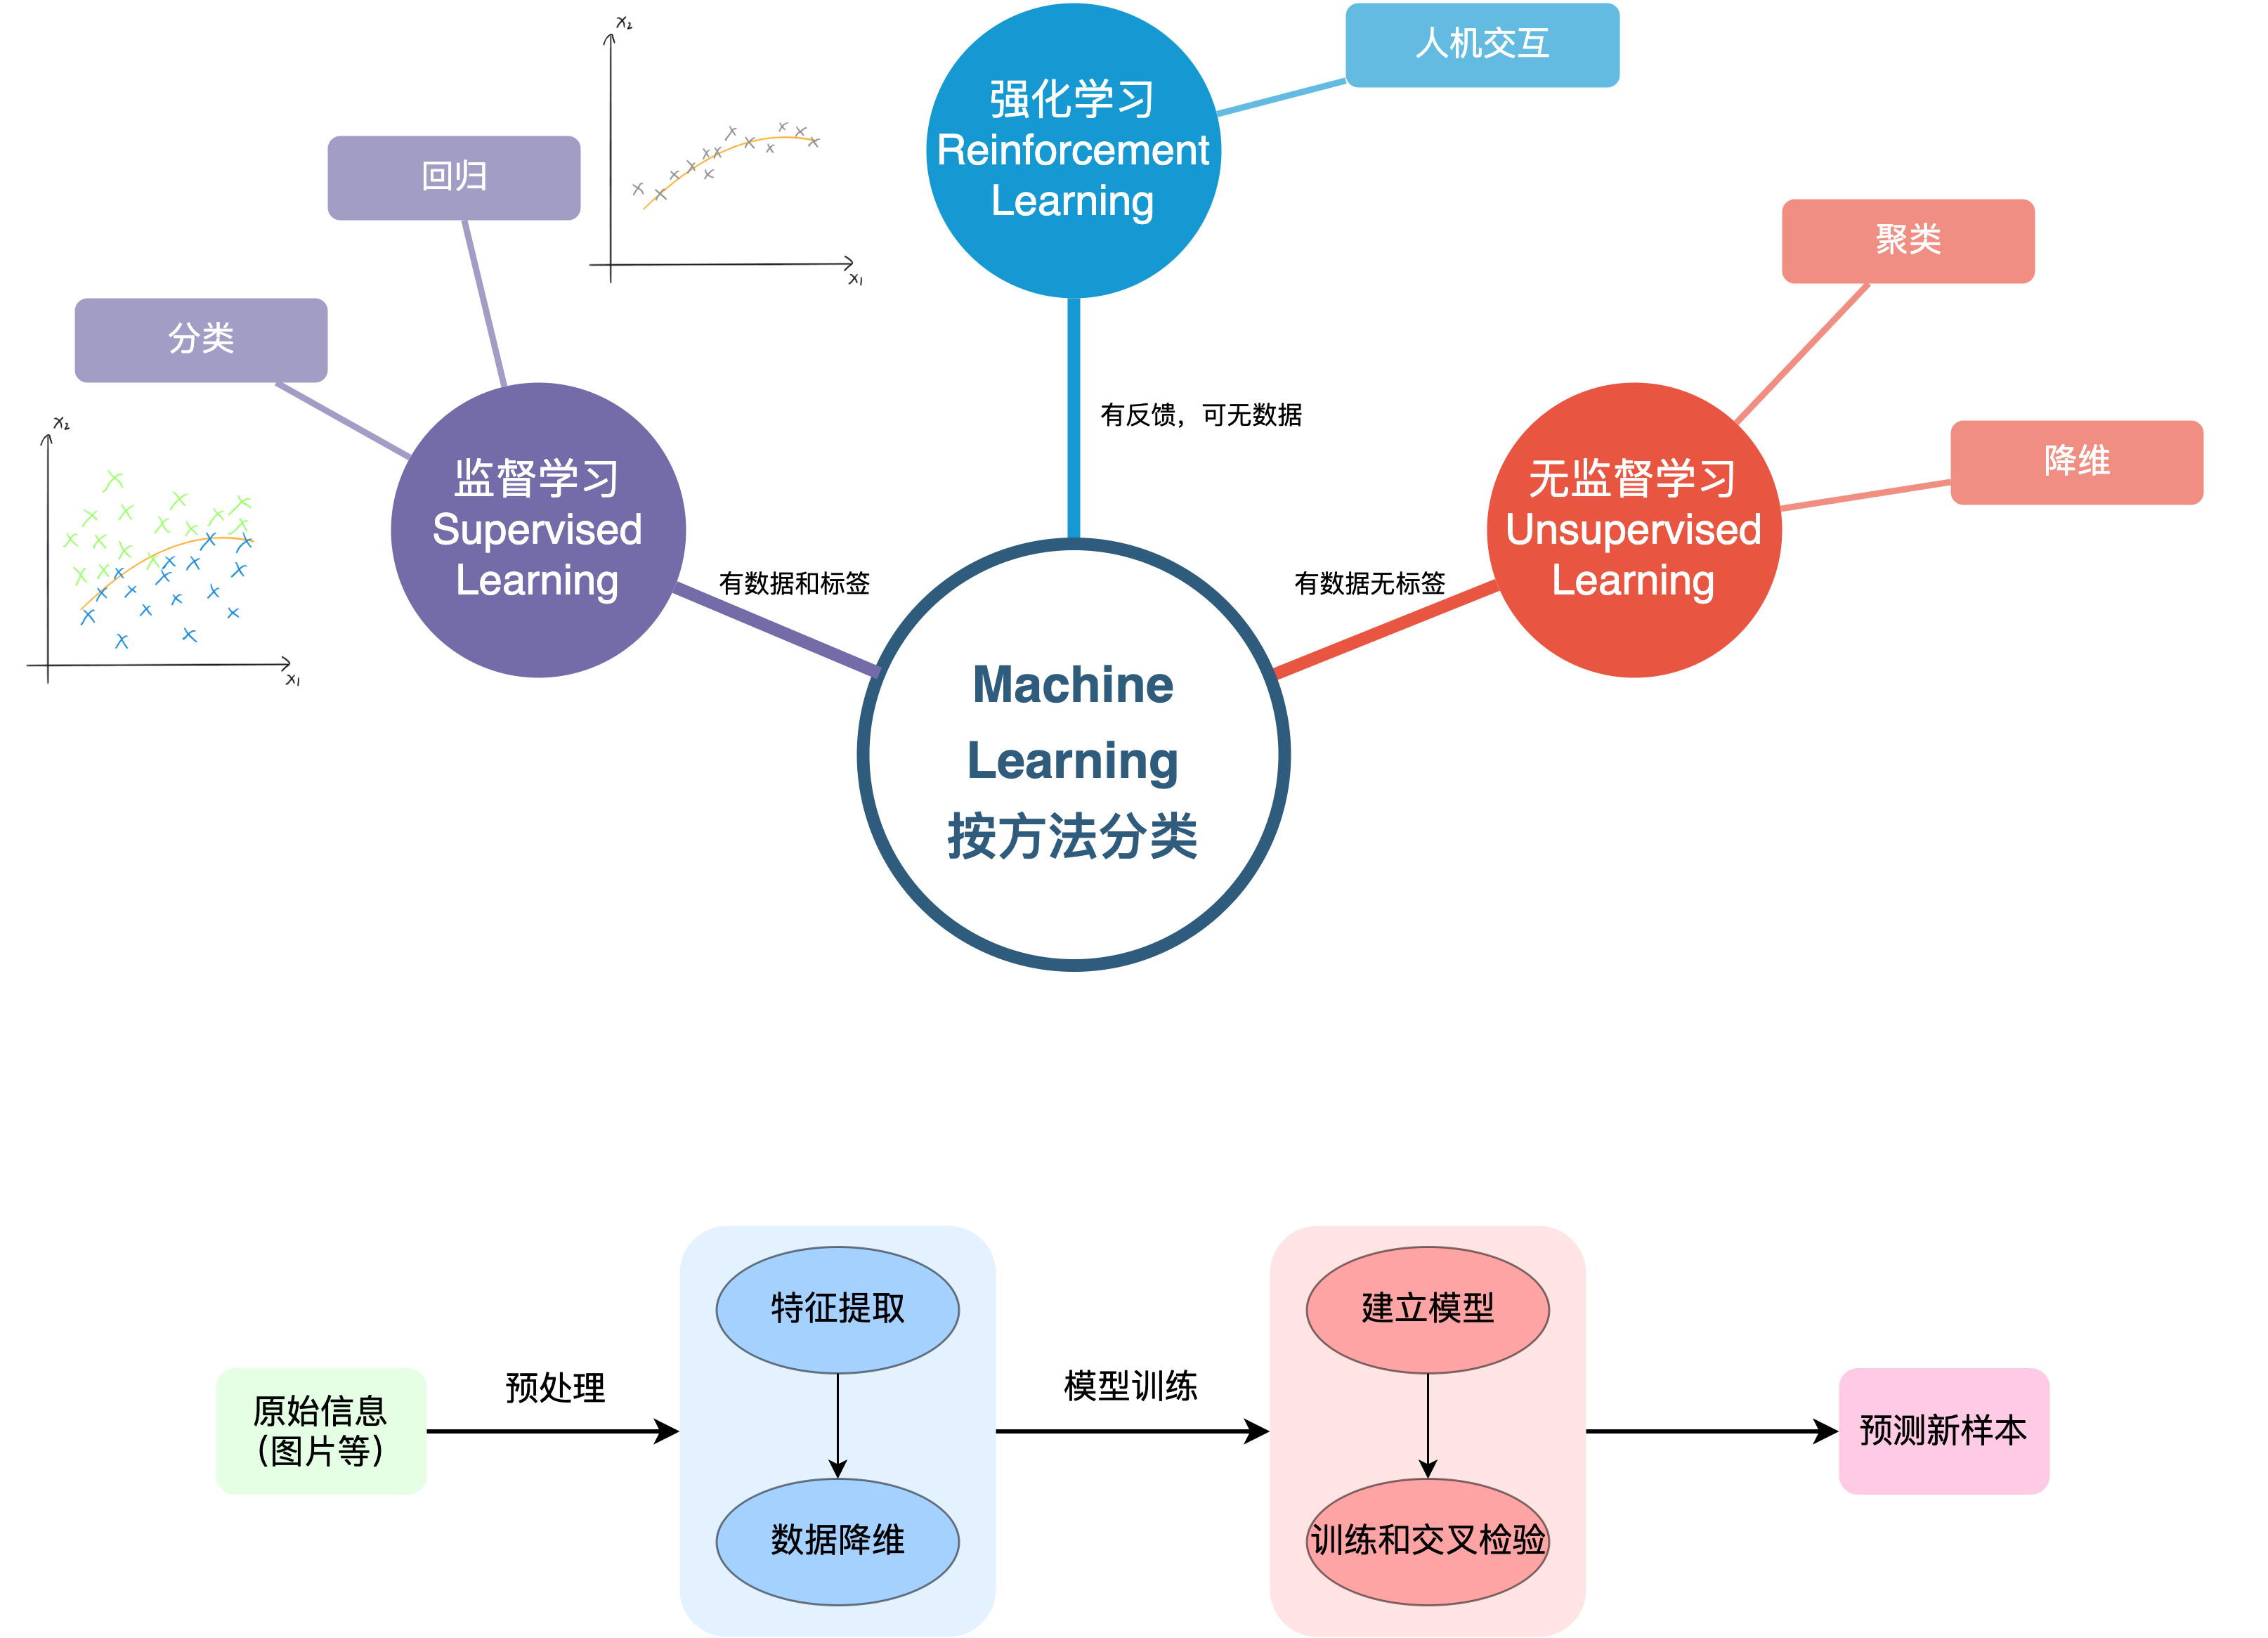

In [16]:
Image("./机器学习基本概念.png",width=900,embed=True)

---

### 一周速成学习路线

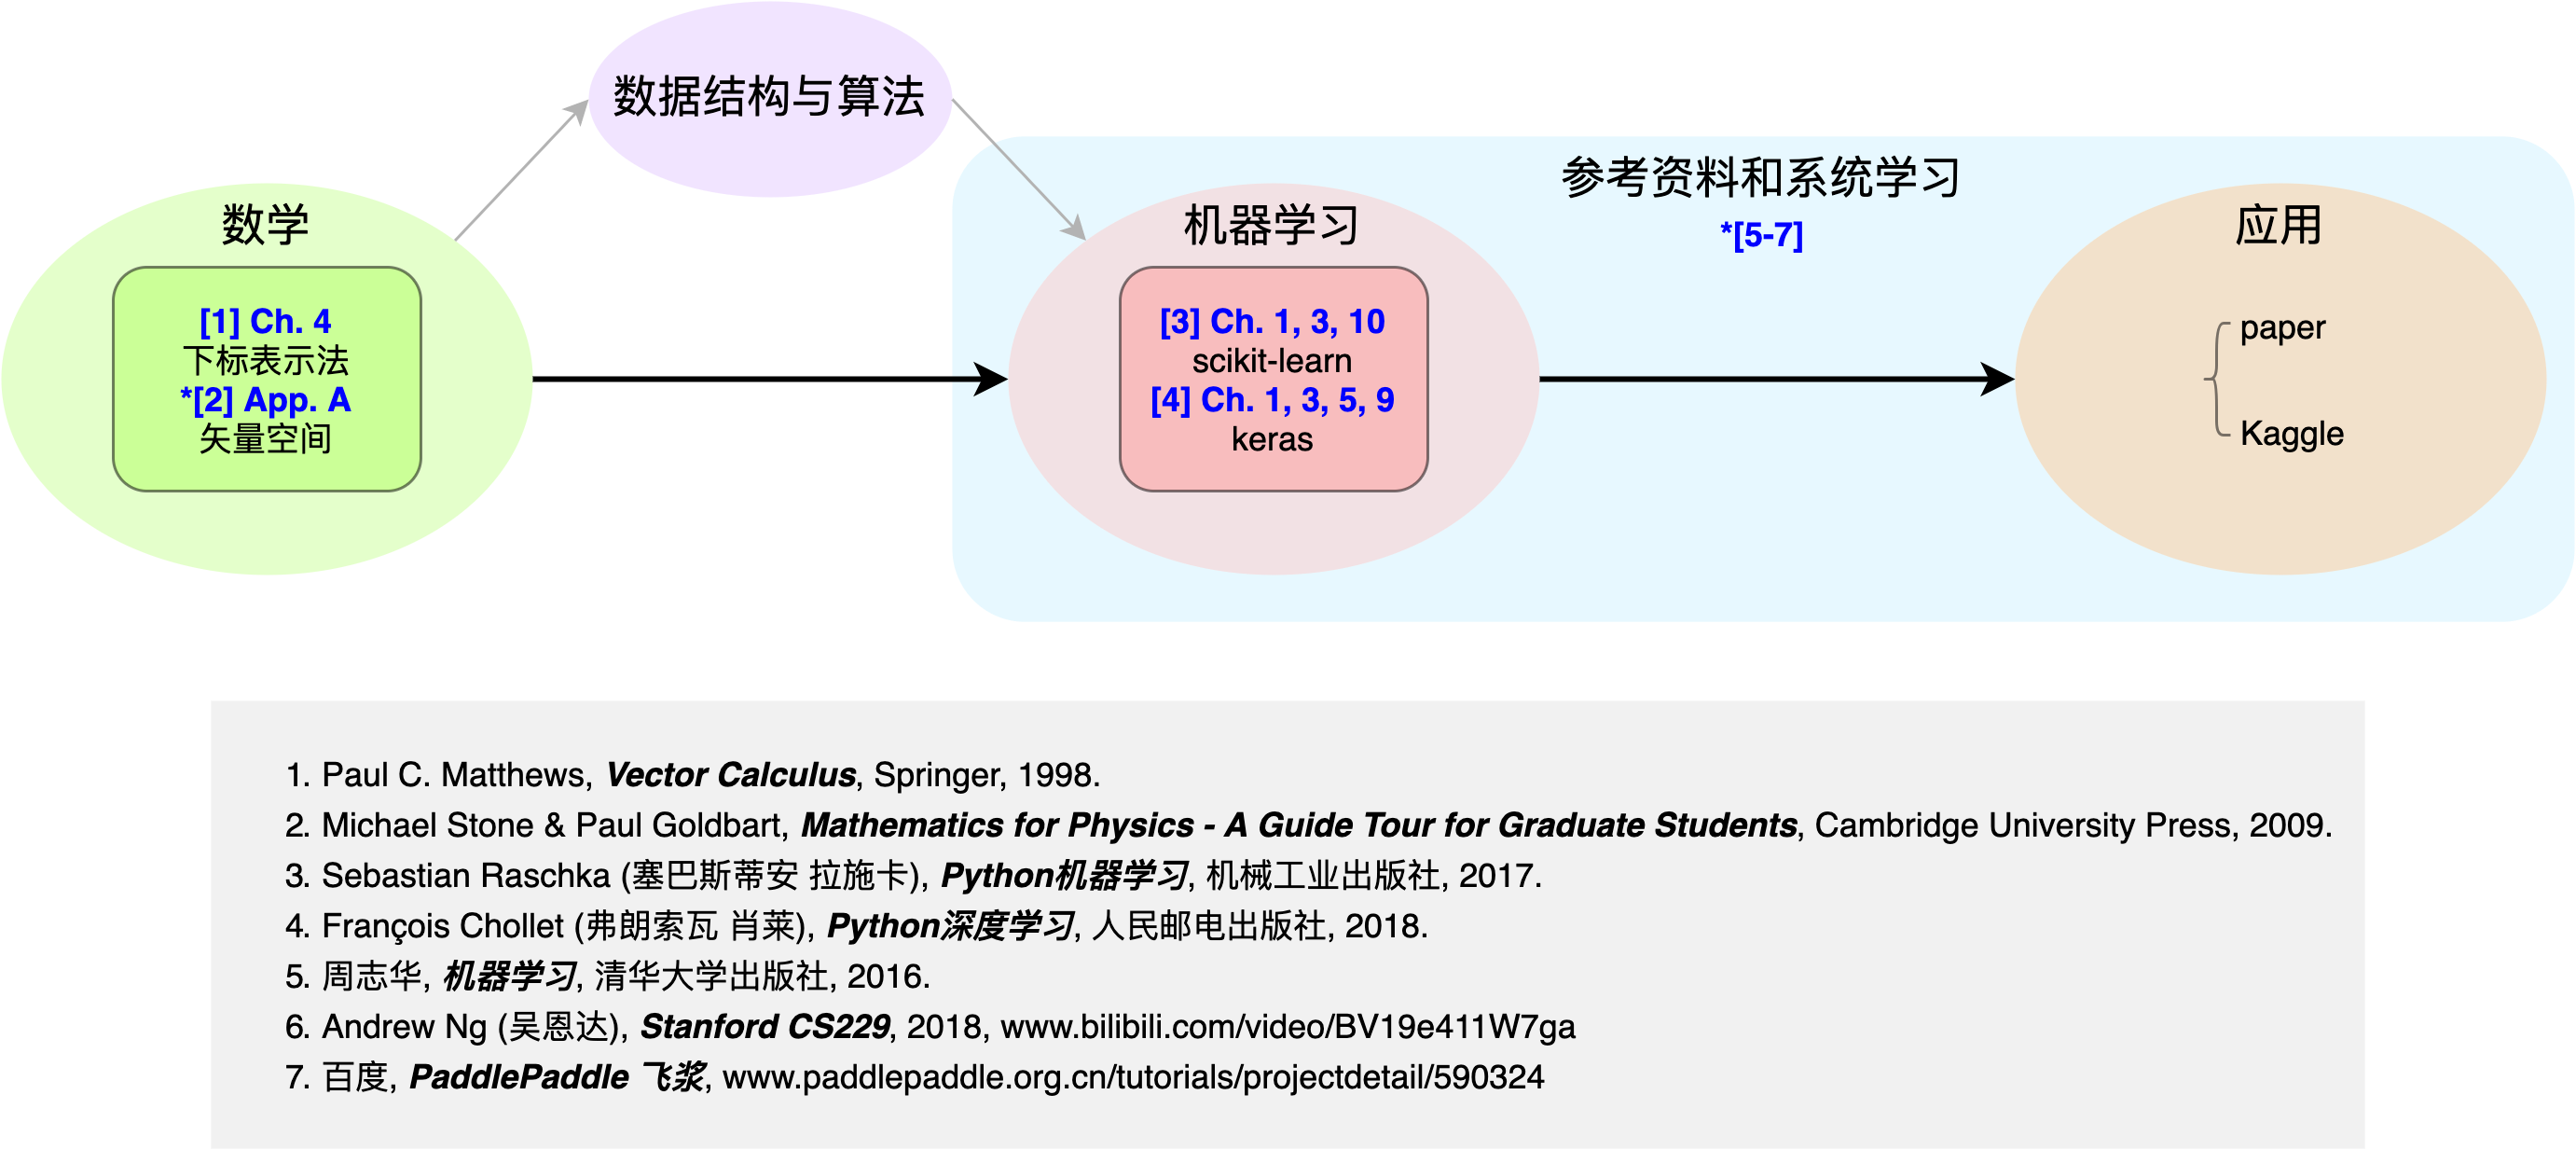

In [18]:
Image("./LearnML.png",width=900,embed=True)

---

---

## 二、Python和机器学习中的分类算法

### 0. 环境配置

`$ <指令>` 代表在 Terminal 终端（mac）或 Powershell（windows）中输入指令，并按回车键执行。由于 mac 自带 python2，所以需要把指令中出现的第一个 `pip` 或 `python` 分别换成 `pip3` 和 `python3`，否则会默认调用 python2。

* 安装 python3，[www.python.org](https://www.python.org)，当前可能是 python 3.8 版本，建议安装 3.7
* 将 pipy 下载源配置为清华镜像，[mirrors.tuna.tsinghua.edu.cn/help/pypi/](https://mirrors.tuna.tsinghua.edu.cn/help/pypi/)
* 安装所需要的 python 模块，`$ pip install <模块>`

模块 | 功能
---- | ----
numpy | matlab
matplotlib | 画图
sklearn | 机器学习
theano/tensorflow | 深度学习框架
keras | 深度学习API

  > 安装之前可先通过 `$ pip list` 查看已安装的模块

---

### 1. 数据集

```python
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split  # 用于把样本划分训练集和测试集，以前的cross_validation模块停用
from sklearn.preprocessing import StandardScaler      # 数据预处理，将每个特征的统计数据都缩放为标准正态分布

iris = datasets.load_iris()                           # iris是Bunch类的实例化对象，包含data、target等属性

X    = iris.data[:,[2,3]]                             # X是150个样本，每个样本只取花瓣长度和花瓣宽度两个特征
y    = iris.target                                    # y是每个样本的类别标签

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=0)  # 测试集45个样本，训练集105个样本
dataScaler = StandardScaler()                         # 实例化一个 StandardScaler 对象

dataScaler.fit(XTrain)                                # 样本缩放前先计算 mean 和 std
XTrainStd = dataScaler.transform(XTrain)              
                                                      # 训练集和测试集分别进行标准化处理
dataScaler.fit(XTest)
XTestStd  = dataScaler.transform(XTest)
```

* 导入 scikit-learn 机器学习包中的鸢尾花数据集

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

* 鸢尾花数据集包含***150***个样本，每个样本有***4***个特征：萼片长度、萼片宽度、花瓣长度、花瓣宽度。这些样本分属三个种类：山鸢尾（setosa），杂色鸢尾（versicolor），维吉尼亚鸢尾（virginica）。

In [ ]:
??iris # 显示变量iris的类型、属性和成员函数等

* 将150个样本的花瓣长度和花瓣宽度两个特征储存在变量`X`中，把标签（即每个样本的种类）储存在变量`y`中

In [2]:
X = iris.data[:,[2,3]]
y = iris.target

In [ ]:
X.shape # 显示变量X的维度属性

In [ ]:
iris['data'] # 变量iris属性的另一种访问方法

* 划分训练集和测试集

In [3]:
from sklearn.model_selection import train_test_split

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=0)

* 数据预处理，可有效提升训练效果。这里把每个特征的变为0，标准差变为1。

In [4]:
from sklearn.preprocessing import StandardScaler

dataScaler = StandardScaler()

dataScaler.fit(XTrain)
XTrainStd = dataScaler.transform(XTrain)

dataScaler.fit(XTest)
XTestStd  = dataScaler.transform(XTest)

In [ ]:
XTest # 显示预处理前的样本测试集XTest

In [ ]:
XTestStd # 显示预处理后的样本测试集XTestStd

In [ ]:
np.mean(XTrainStd[:,0]) # 用numpy中的mean函数计算XTestStd第一列的均值，应该得到0

In [ ]:
np.std(XTestStd[:,0]) # 用numpy中的std函数计算XTestStd第一列的标准差，应该得到1

In [ ]:
np.mean(XTest[:,0]) # 未经过标准化处理的XTest第一列均值不是0

In [ ]:
np.std(XTest[:,0])

---

### 2. 模型训练

#### 支持向量机 SVM

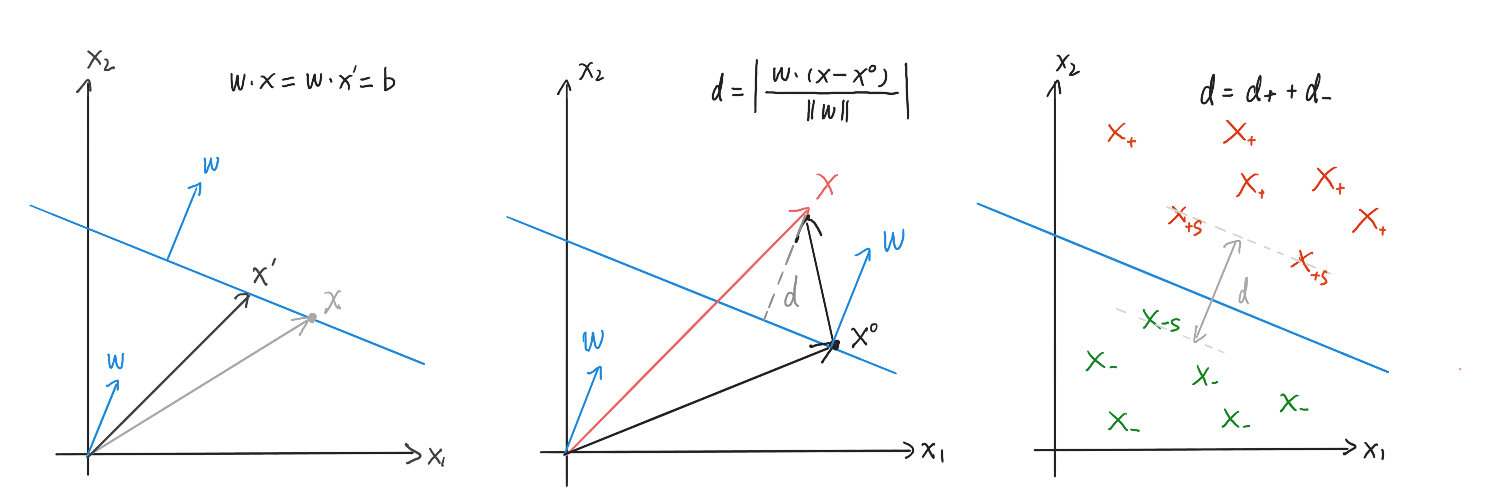

In [19]:
Image("./SVM.png",width=900,embed=True)

平面的矢量表达式为

$$w\cdot x\equiv b,\textrm{ 也可写成 } w^T x - b=0$$

$w$ 为平面的法向量，$x$ 为平面上任一点的位置矢量，$b$ 为常数。空间中任一点 $x$ 到平面的距离是

$$d = \frac{|w^T x-b|}{||w||}$$

其中 $||w||$ 为法向量的长度。

支持向量机即找到一个超平面，把不同类别的样本划分到超平面两侧。两类样本中距离超平面最近的点称为***支持向量***。

$x_{+S}$ 和 $x_{-S}$ 分别代表两类样本的支持向量，到超平面的距离分别为。若超平面的方程为 $w^T x -b=0$，则可以通过平移超平面和缩放坐标使得支持向量分别满足

$$w^T x_{+S}-b=1,\quad w^T x_{-S}-b =-1$$

此时两类样本到超平面的距离分别为

$$d_+ = \frac{w^T x_{+S}-b}{||w||}=\frac{1}{||w||}, \quad d_- = -\frac{w^T x_{-S}-b}{||w||}=\frac{1}{||w||}$$

因此两类样本的间隔定义为

$$d = d_+ + d_- = \frac{2}{||w||}$$

超平面的可表示为求条件极值

$$\max \frac{2}{||w||} ~\Leftrightarrow~ \min \frac 1 2 ||w||^2$$

$$\textrm{s.t.}\quad (w^T x_{+S} -b)= 1,\quad (w^T x_{-S} -b)= -1$$

在 python 中使用支持向量机：

```python
from sklearn.svm import SVC                              # SVC 即 Support Vector Classification
from sklearn.metrics import accuracy_score               # 导入准确率验证函数

svm = SVC(kernel='linear', random_state=0)               # 建立模型，svm是SVC类的一个实例化对象

svm.fit(XTrainStd, yTrain)                               # Key Step 1: 模型训练
yPredict = svm.predict(XTestStd)                         # Key Step 2: 模型预测

accuracy = accuracy_score(y_true=yTest, y_pred=yPredict) # 计算模型的准确率
```

* 初始化 svm 模型

In [5]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=0)

In [ ]:
??svm # 显示 svm 的属性和使用方法

* 模型训练和预测

In [6]:
svm.fit(XTrainStd, yTrain) # 具体的优化过程都封装在 svm 的成员函数 fit 中了，只需输入训练数据和标签即可训练模型

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
yPredict = svm.predict(XTestStd) # 用训练好的模型对测试集进行预测

* 计算模型的准确率

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=yTest, y_pred=yPredict) # 直接调用 accuracy_score 函数计算准确率

0.9333333333333333

In [ ]:
yPredict # 显示测试集预测的标签

In [ ]:
yTest # 显示测试集的真实标签

In [ ]:
yTest-yPredict # 预测结果与真实结果对比，准确率大约为93%

In [ ]:
np.sum(yTest==yPredict)/yTest.size # 准确率的手动计算方法

非线性分类可先映射至高维度空间，然后再利用超平面分类。

---

#### 决策树

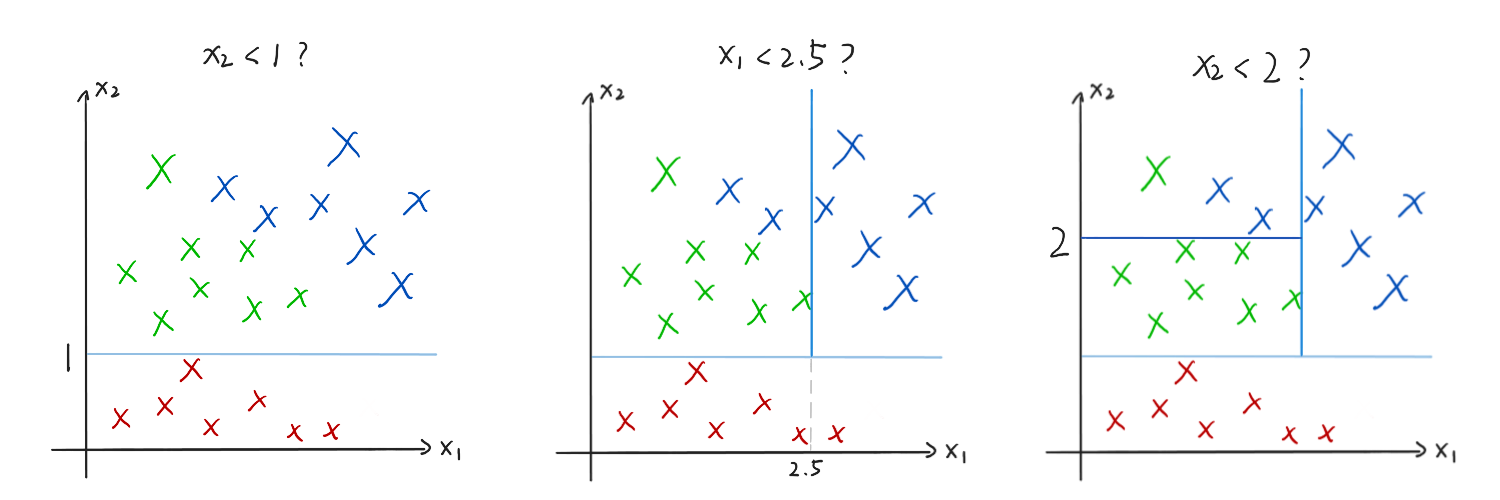

In [20]:
Image("./tree.png",width=900,embed=True)

每进行一次判断，相当于在样本空间中做一次划分。根据判断前后的样本分布，可以计算出这次判断的信息增益。决策树通过信息增益最大来划分样本空间。

总样本集合为 $D$， 每一个节点的信息熵

$$E(D) = -\sum_i p_i \log p_i$$

$i$ 为类别编号。经过判断之后，将样本划分为不同区域。信息增益定义为

$$GI = E(D)-\sum_a \frac{D_a}{D} E(D_a)$$

$D_a/D$ 表示划分后子区域 $a$ 中的样本数与划分前父区域样本总数的比值。信息增益越大，则根据这一属性划分的结果越纯。除信息熵外，决策树还可以使用其他判据计算信息增益。

在 python 中使用决策树：

```python
from sklearn.tree import DecisionTreeClassifier          # 导入 sklearn 中的决策树分类器模型（还有决策树回归器）
from sklearn.metrics import accuracy_score               # 导入准确率验证函数

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0) # 初始化决策树模型

tree.fit(XTrain,yTrain)                                  # Key Step 1: 模型训练
yPredict = tree.predict(XTest)                           # Key Step 2: 模型预测

accuracy = accuracy_score(y_true=yTest, y_pred=yPredict) # 计算模型的准确率
```

* 初始化决策树模型，用信息熵计算信息增益，最大树深度为3

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

* 模型训练和预测

In [10]:
tree.fit(XTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [11]:
yPredict = tree.predict(XTest)

* 计算模型的准确率

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=yTest, y_pred=yPredict)

0.9777777777777777

* 训练好的决策树模型导出为.dot格式，.dot格式可转化为其他图片

In [ ]:
from sklearn.tree import export_graphviz 

export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])

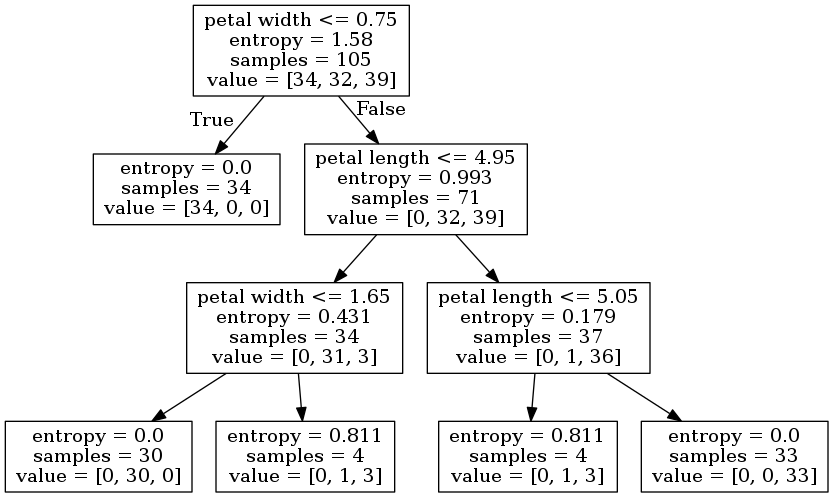

In [23]:
Image("./tree-en.png",width=600,embed=True)

* 演示上图中初始节点信息熵的计算过程

In [13]:
n = 105
p = np.array([34,32,39])/n
entropy0 = -np.sum(p*np.log2(p))
entropy0

1.5799176782552726

多棵决策树可形成决策树森林，分类能力更强且不易造成过拟合。

---

#### 人工神经网络

训练集 `XTrain` 包含 105 个样本，带括号的上标代表样本编号，每个样本**矢量**表示为

$$x^{(\alpha)},~\alpha = 1,\dots,105$$

每个样本矢量有两个**分量**，分别为花瓣长度和花瓣宽度，用下标表示

$$x^{(\alpha)}_i,~i=1,2$$

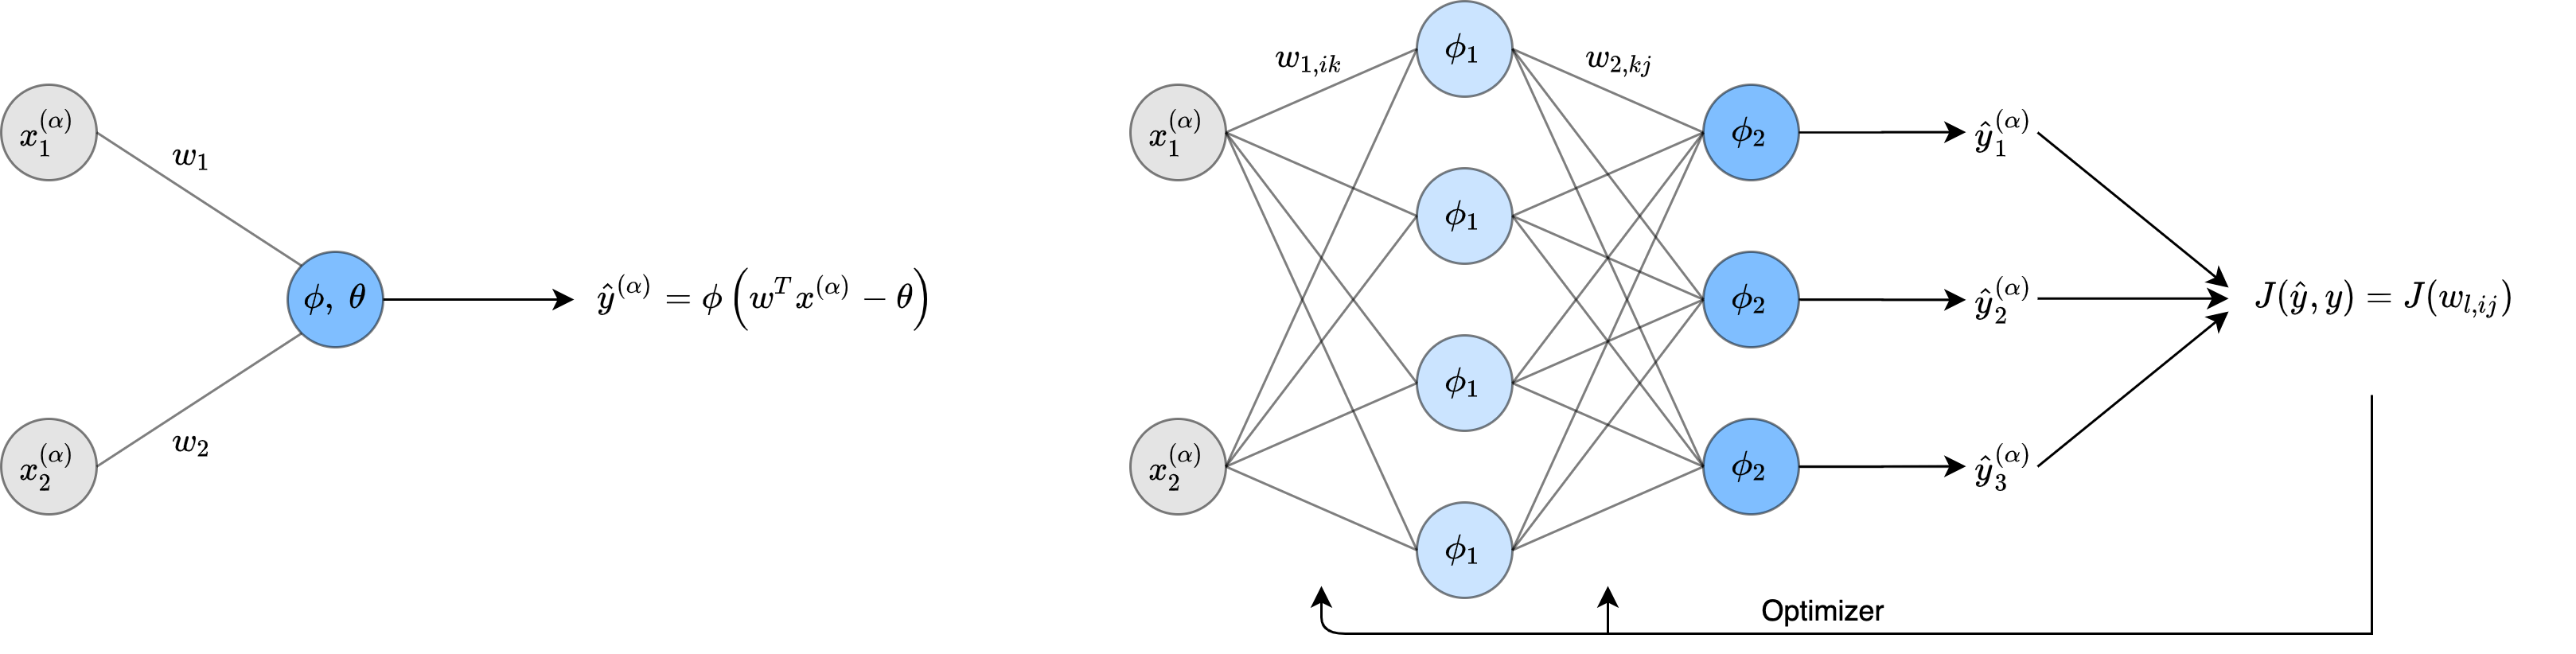

In [25]:
Image("./NN.png",embed=True)

人工神经元包含两个特征：

* 激活函数 $\phi$
  
  通常需要人为指定，常用类型包括 sgn, logistic (sigmoid), relu 等。最早的人工神经元模型以阶跃函数 sgn 作为激活函数，只有0和1两种状态。当输入大于阈值时，神经元处于激活状态。
  
  
* 阈值 $\theta$

  神经元的输出值为 $\widehat{y}^{(\alpha)} = \phi(\sum w_i x^{(\alpha)}_i -\theta)$。

${}$单个人工神经元构成一个***感知器*** (Perceptron)。感知器利用样本对权重 $w_i$ 和阈值 $\theta$ 进行训练，以使输出值 $\widehat{y}$ 接近真实的标签值 $y$。

> 感知器只能进行线性分类，而当使用两层神经元时，就可以解决非线性分类问题。深度学习即包含两层及以上的人工神经网络，应用通常可达上百层。深度增大时，模型的学习能力增强，但训练难度增大且更可能出现过拟合。

人工神经网络包含输入层、隐含层和输出层，其中输入层只是传递样本的分量，不进行运算；而隐含层和输出层都是功能性神经元。样本的类别标签 `y` 可以取 `0,1,2`。使用人工神经网络时，需要先把标签转化为矢量，即 `0->[1,0,0], 1->[0,1,0], 2->[0,0,1]`。人工神经网络即找到输入矢量和输出矢量间的映射。

$w_{l,ij}$ 表示第 $l-1$ 层第 $i$ 个神经元输入到第 $l$ 层第 $j$ 个神经元的权重。在训练过程中，人工神经网络的输出值为 $\hat{y}$，可根据输出值和训练样本的真实标签计算出***损失函数***（Loss Function）。$J$ 可以是 $\widehat{y}$ 的函数，也可以是 $w_{l,ij}$ 的函数。训练的过程即利用***优化器***（Optimizer）更新权重的值，使损失函数收敛到最小值。

${}$优化器通常采用随机梯度下降算法。理想状态下 $\widehat{y}=y$，而二者不相等时，损失函数相比理想状态时的增量为 $\Delta J \approx \frac{\partial J}{\partial \widehat{y}}(\widehat{y}-y)$。优化的目标即使得 $\Delta J$ 不断减小。又因为 $J$ 也是 $w$ 的函数，当权重值发生微小变化 $w_{l,kj}\rightarrow w_{l,kj}+\Delta w_{l,kj}$ 时，损失函数的变化量为

$$\Delta J = \frac{\partial J}{\partial w_{l,kj}}\Delta w_{l,kj}$$

${}$利用各层层神经元激活函数的性质，可以把上式中的梯度转化为 $\widehat{y}$ 和 $y$ 的函数，比如对输出层

$$\frac{\partial J}{\partial w_{2,kj}}=\frac{\partial J}{\partial \widehat{y}_j}\frac{\partial \widehat{y}_j}{\partial w_{2,kj}}=g_j(\widehat{y}_j,y_j)$$

如果沿着梯度的反方向更新权重，

$$\Delta w_{2,kj} = -\eta g_j(\widehat{y}_j,y_j)$$

${}$则 $\Delta J = -\eta \left|g(\widehat{y},y)\right|^2$，可以使 $\Delta J$ 不断减小。输出层的权重较容易计算，在此基础上可利用链式法则求前一层的权重函数，这种向前传递误差的方法称为***反向传播***（BackPropagation，BP）。

在 python 中进行深度学习：

```python
from keras.models          import Sequential          # Sequential 是整个人工神经网络的容器
from keras.layers          import Dense, Activation   # Dense 为神经网络的层，Activation 为激活函数
from keras.optimizers      import SGD                 # SGD 是随机梯度下降优化器
from sklearn.preprocessing import LabelBinarizer      # 导入 LabelBinarizer 函数，用于将标签转化为矢量
from sklearn.metrics       import accuracy_score      # 导入 sklearn 的准确率验证函数，注意 keras 自身也有准确率函数


dnn = Sequential(               # 初始化人工神经网络模型，dnn 是 Sequential 的一个实例化对象
[
    Dense(4, input_dim=2),      # 建立第一层4个神经元，输入为2维（即样本矢量的维度）
    Activation("relu"),         # 指定第一层神经元的激活函数为 relu
    Dense(3                     # 建立第二层3个神经元，输入维度自动设为上一层神经元的个数
    Activation("sigmoid"),      # 指定第二层神经元的激活函数为 sigmoid
])

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) #初始化一个随机梯度下降函数

dnn.compile(optimizer=sgd, loss='categorical_crossentropy') # 编译人工神经网络模型

label  = LabelBinarizer()                            
yTrainLabel = label.fit_transform(yTrain)             # 把训练集标签转化为矢量，即 0->[1,0,0], 1->[0,1,0], 2->[0,0,1]

trainingProcess=dnn.fit(XTrain, yTrainLabel, epochs=500, batch_size=40) # 模型训练，并用变量 trainingProcess 存储训练过程

yPredict = dnn.predict_classes(XTest)                       # 模型预测

accuracy = accuracy_score(y_true=yTest, y_pred=yPredict)    # 计算模型的准确率
```

* 构建人工神经网络模型

  常见的激活函数可以参考 [https://baike.baidu.com/item/激活函数](https://baike.baidu.com/item/激活函数)，[https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/](https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/)

In [14]:
from keras.models import Sequential         
from keras.layers import Dense, Activation   

dnn = Sequential(                                  
[
    Dense(4, input_dim=2),      
    Activation("relu"),      
    Dense(3),                
    Activation("sigmoid"),  
])

Using Theano backend.


* 初始化优化器函数。这里使用随机梯度下降算法，“随机”含义是权重和阈值的初始值随机设定（通常设为很小的数）

  `lr` 是学习率，应取足够小的数。并且 `lr` 可以随着迭代次数的增加逐渐减小，减小的值就是 `decay`。采用 `nesterov` 动量方法对梯度下降进行加速，并且避免模型陷入局部极小值。`momentum` 决定加速程度，应选取大于 0 的数

In [15]:
from keras.optimizers import SGD  

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

* 人工神经网络模型需要编译，并指定优化器和损失函数。这里的损失函数采用 `categorical_crossentropy`

  模型 API 可以参考 keras 官方文档 [https://keras.io/api/models/model_training_apis/](https://keras.io/api/models/model_training_apis/)

In [16]:
dnn.compile(optimizer=sgd, loss='categorical_crossentropy')

* 把标签转化为矢量

In [17]:
from sklearn.preprocessing import LabelBinarizer

label  = LabelBinarizer()                            
yTrainLabel = label.fit_transform(yTrain)

* 模型训练和预测。默认显示每一步的训练过程，可以在单元格开头加上魔法函数 `%%capture` 隐藏本单元格的输出。

  `epochs` 为 `XTrainStd` 和 `yTrainLabel` 全部被迭代的次数，默认为1。通常需要指定为一个足够大的数。`batch_size` 为每次迭代使用的样本数，默认为32

In [18]:
%%capture

trainingProcess=dnn.fit(XTrain, yTrainLabel, epochs=500, batch_size=40)

In [19]:
yPredict = dnn.predict_classes(XTest) #这里 predict_classes 会把矢量标签转化成原来的类别

* 计算模型的准确率

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=yTest, y_pred=yPredict)

0.9777777777777777

* 导出模型，即导出权重值，下次使用时可直接 `dnn.load_weights("Weights of DNN")`

In [ ]:
dnn.save_weights("Weights of DNN")

* 画出模型训练过程中，损失函数的变化，可以看到损失函数逐渐收敛

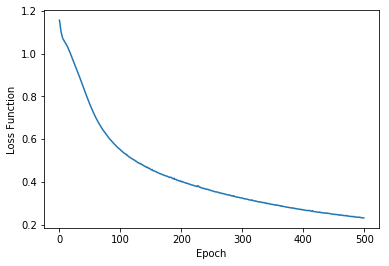

In [23]:
import matplotlib.pyplot as plt

lossFunction = trainingProcess.history['loss']

plt.plot(range(len(lossFunction)), lossFunction);
plt.xlabel('Epoch')
plt.ylabel('Loss Function')
plt.show()

---

### 3. 分类结果可视化

* 定义二维分类画图函数 plot_decision_regions( )

In [24]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('1', 'x','+','s', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    if(Z[0].size != 1):
        Z = classifier.predict_classes(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1], alpha=1.0, c=cmap(idx), 
                        marker='o', s=55, label='test set')

---

* SVM 分类可视化

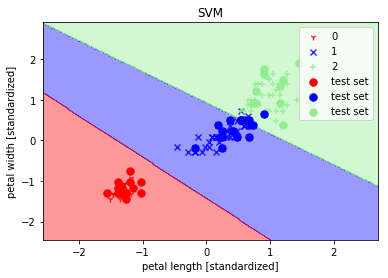

In [25]:
XCombinedStd = np.vstack((XTrainStd, XTestStd)) # 合并标准化处理后的训练集和测试集样本
yCombined = np.hstack((yTrain, yTest))          # 合并训练集和测试集标签

plot_decision_regions(XCombinedStd, yCombined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper right')
plt.title('SVM');

---

* 决策树分类可视化

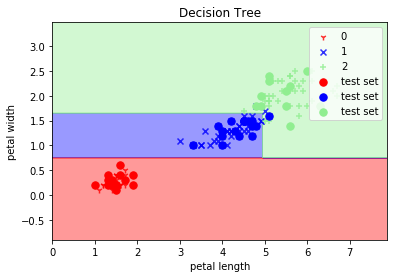

In [26]:
XCombined = np.vstack((XTrain, XTest))          # 合并训练集和测试集样本，注意决策树使用的是未经标准化处理的样本
yCombined = np.hstack((yTrain, yTest))          # 合并训练集和分类集标签

plot_decision_regions(XCombined, yCombined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper right')
plt.title('Decision Tree');

---

* 人工神经网络分类可视化

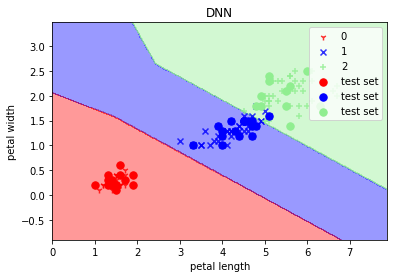

In [27]:
XCombined = np.vstack((XTrain, XTest))          # 合并训练集和测试集样本，注意此处人工神经网络使用的是未经标准化处理的样本
yCombined = np.hstack((yTrain, yTest))          # 合并训练集和分类集标签

plot_decision_regions(XCombined, yCombined, classifier=dnn, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper right')
plt.title('DNN');